## **Sentiment Analysis- Arabic News** 
### *Evaluating Arabic News Attitudes towards America through NLP Analysis and a Predictive Classification Model*

***

 by: Andrew Rachuig, Kyle Green, Mindy Shiben, and Paige Rackley

### Introduction : 
*** 
The United States has made itself a key player in the Middle East by using its diplomatic, economic, and military power in support of national and international interests. Since the 9/11 terrorist attacks on U.S. soil, one of the most consequntial events in the modern world, tensions between the two regions have been undoubtedly high. With remarkable communication and technology enhancements in the 21st century, we've become more aware of biases portrayed in mainstream media, and Middle Eastern media is no exception. Two-thirds of Arab nationals overall say they trust mass media such as newspapers, TV, and radio to report news fully, fairly, and accurately (mideastmedia.org, 2017). Through examining almost half a million Arabic news articles between 2000 and 2014 from 10 different Middle Eastern news outlets, we can see how different factors (such as international events) may drive overall sentiment and sentiment towards America. Having this kind of insight may inform policy makers and influence decision making moving forward. This project can deliver an integral piece of the puzzle of America's foreign policy towards the world.

### Project Goals:
*** 
The goal of this project is to use the data we have acquired from our sources to build a classification model that can help predict an articles sentiment towards America. Through exploration using Natural Language Processing (NLP) and data visualizations, we want to find trends that will help us determine features to use in our model that will help us predict sentiment. By using NLP, we can deep dive into features further to even find correlations between specific words and sentiment that will help our predictions. 

### Summary of Findings & Recommendations:
***

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
%matplotlib inline
import matplotlib.pyplot as plt
import re
import datetime
import warnings
from scipy import stats
from scipy.stats import pearsonr, spearmanr

from googletrans import Translator

### Acquiring the Data
***
#### - All data was sourced from the [Abu El-Khair Corpus](http://abuelkhair.net/index.php/en/arabic/abu-el-khair-corpus)
        - Includes more than five million Arabic news articles from 2000-2014

#### - Downloaded 10 separate XML files containing all the articles (~ 20 GB)


### Prepare the Data

In [2]:
data = pd.read_csv('daily8_5.csv')
#import data with sentiment analysis
data['dateline'] = pd.to_datetime(data.dateline)
#convert data type 
df = data.copy()
#make df copy for easy reference
df = df[df.text_label != 'False']
#drop rows that have not been assigned a sentiment due to being too large for now
df.info()
#snapshot of df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237706 entries, 1 to 331869
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   index           237706 non-null  int64         
 1   id              237706 non-null  object        
 2   url             237706 non-null  object        
 3   headline        237706 non-null  object        
 4   dateline        237706 non-null  datetime64[ns]
 5   text            237706 non-null  object        
 6   tags            237706 non-null  object        
 7   source          237706 non-null  object        
 8   text_label      237706 non-null  object        
 9   text_score      237706 non-null  object        
 10  headline_label  237706 non-null  object        
 11  headline_score  237706 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(9)
memory usage: 23.6+ MB


### Explore

#### Initial Hypothesis and Questions: 
    - What’s the relationship between article sentiment and world events? (Post MVP)
    - What is the relationship between news sources and the target? 
    - What is the relationship between country of source and target?
    - What is the relationsheep between tag and target?
    - Is there a relationship between time and sentiment?
    - Is there a relationship between sentiment of the headline and sentiment of text?

### Example of how we can format our questions:


Question:


Visual:


Stat testing if needed


Takeway

## Question 1: What is the relationship between news sources and the target? country of source and the target?

In [3]:
source_perc = pd.crosstab(df.source, df.text_label, margins=True)
source_perc = source_perc.apply(lambda x: x / x['All'] * 100, axis=1)
source_perc = source_perc.drop(columns=['All'])
source_perc
#view distributions of news sources w/target

text_label,negative,neutral,positive
source,,,
Alittihad,11.974978,81.566875,6.458147
Almasryalyoum,37.028026,60.125535,2.846438
Almustaqbal,19.414117,78.232984,2.352899
Alqabas,19.210552,75.635160,5.154288
Echoroukonline,20.006032,76.887504,3.106464
Ryiadh,25.256066,68.220513,6.523421
Sabanews,5.522914,91.715629,2.761457
SaudiYoum,20.478159,71.692211,7.829631
Techreen,49.888426,46.638036,3.473538


In [4]:
transcription_table=pd.DataFrame(
    {
        'source': ['Alittihad','Echoroukonline','Ryiadh','SaudiYoum','Techreen', 'Alqabas', 'Almustaqbal','Almasryalyoum', 'Youm7','Sabanews'],
        'country': ['UAE','Algeria','Saudi_Arabia','Saudi_Arabia','Syria', 'Kuwait', 'Lebanon','Egypt','Egypt','Yemen']
    }
)

mapping = transcription_table.set_index('source').to_dict()['country']

df['country'] = df['source'].apply(lambda x: mapping.get(x))
#map country to news source

country_perc = pd.crosstab(df.country, df.text_label, margins=True)
country_perc = country_perc.apply(lambda x: x / x['All'] * 100, axis=1)
country_perc = country_perc.drop(columns=['All'])
country_perc
#view distributions of news source country w/target

text_label,negative,neutral,positive
country,,,
Algeria,20.006032,76.887504,3.106464
Egypt,21.167656,75.611941,3.220403
Kuwait,19.210552,75.635160,5.154288
Lebanon,19.414117,78.232984,2.352899
Saudi_Arabia,22.325688,70.349769,7.324544
Syria,49.888426,46.638036,3.473538
UAE,11.974978,81.566875,6.458147
Yemen,5.522914,91.715629,2.761457
All,22.906447,72.587145,4.506407


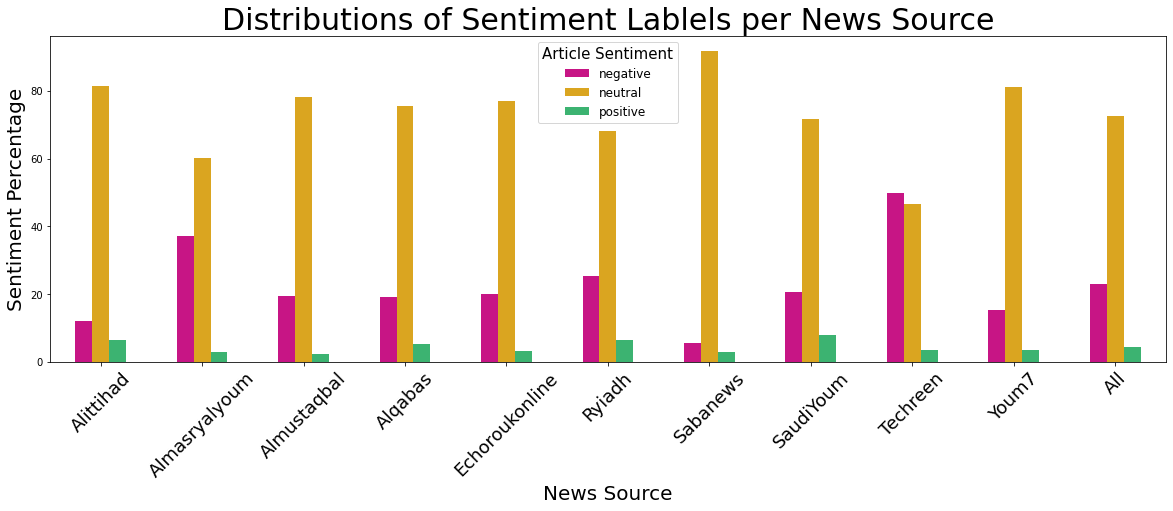

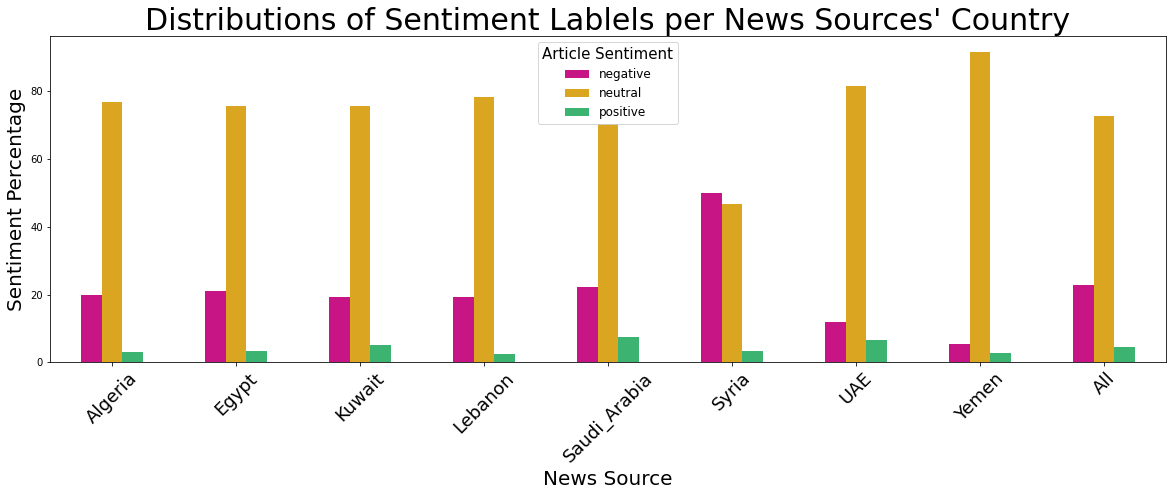

In [5]:
plt.rcParams["figure.figsize"] = (20, 6)

ax1 = source_perc.plot(kind='bar', color=['mediumvioletred', 'goldenrod', 'mediumseagreen'])
ax2 = country_perc.plot(kind='bar', color=['mediumvioletred', 'goldenrod', 'mediumseagreen'])

ax1.set_xlabel("News Source", fontsize=20)
ax2.set_xlabel("News Source", fontsize=20)

ax1.set_ylabel("Sentiment Percentage", fontsize=20)
ax2.set_ylabel("Sentiment Percentage", fontsize=20)

xlabels = ax1.get_xticklabels() 
ax1.set_xticklabels(labels=xlabels, rotation=45, fontsize=18)
xlabels = ax2.get_xticklabels() 
ax2.set_xticklabels(labels=xlabels, rotation=45, fontsize=18)

ax1.set_title('Distributions of Sentiment Lablels per News Source', size=30)
ax1.legend(fontsize=12, title='Article Sentiment',title_fontsize=15)

ax2.set_title("Distributions of Sentiment Lablels per News Sources' Country", size=30)
ax2.legend(fontsize=12, title='Article Sentiment',title_fontsize=15)

plt.show()

### Question 1- Statistical Tests:

- H0: The news source and text_label (sentiment) are independent of one another
- H1: The news source and text_label (sentiment) are have a relationship

In [6]:
alpha =.05

observed = pd.crosstab(df.source, df.text_label)

chi2, p, degf, expected = stats.chi2_contingency(observed)
if p < alpha:
    print('Reject the null hypothesis.')
else:
    print('Fail to reject the null hypothesis.')

Reject the null hypothesis.


- H0: The country of publication and text_label (sentiment) are independent of one another
- H1: The country of publication and text_label (sentiment) are have a relationship

In [7]:
alpha =.05

observed = pd.crosstab(df.country, df.text_label)

chi2, p, degf, expected = stats.chi2_contingency(observed)
if p < alpha:
    print('Reject the null hypothesis.')
else:
    print('Fail to reject the null hypothesis.')

Reject the null hypothesis.


### Question 1- Takeaways - 

What is the relationship between news sources and the target?

- Some individual news sources do seem to vary a bit in general sentiment trends. Noteably, the source Teshreen has a very high number of negative sentiment articles compared to the others while Saba News and Riyadh display the most overall neutrality. There are 2 news sources in Eygpt and interestingly, one (Almasryalyoum) has the second highest negativity rate while the other (Youm7) appears to be one of the more neutral leaning sources. Saudi Arabia is the other country with 2 news sources (Ryiadh & SaudiYoum)   

## Explore Question 2: What is the relationship between tag and target?

/var/folders/s4/hmz6ljm533vgpm_bhv59yw0m0000gn/T/ipykernel_97887/3562335712.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_20['en_tags'] = top_20['english_tags'].apply(lambda x: ','.join(map(str, x)))


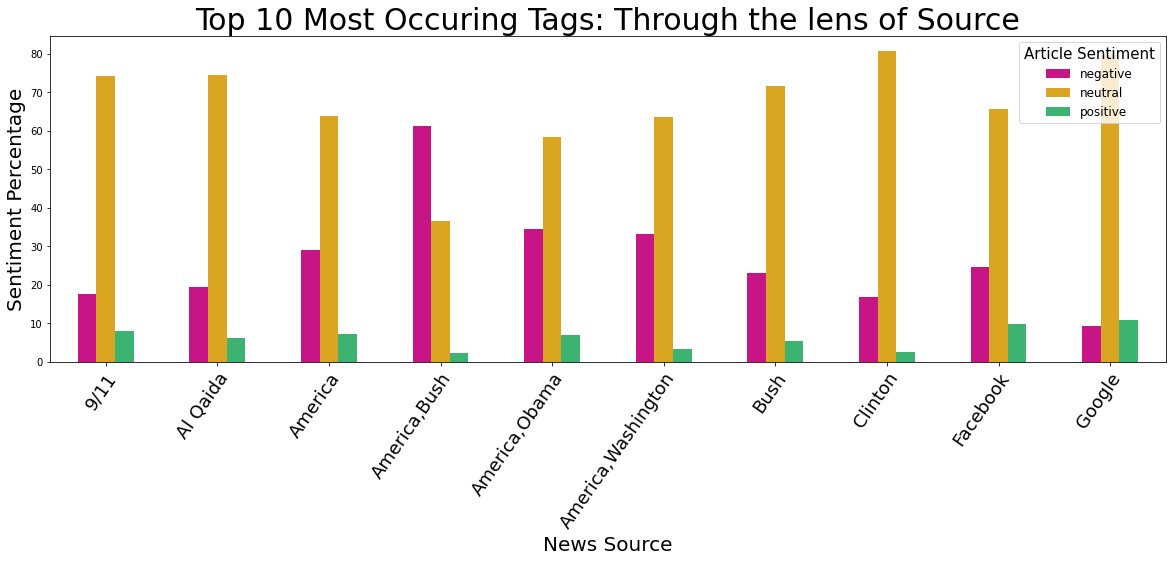

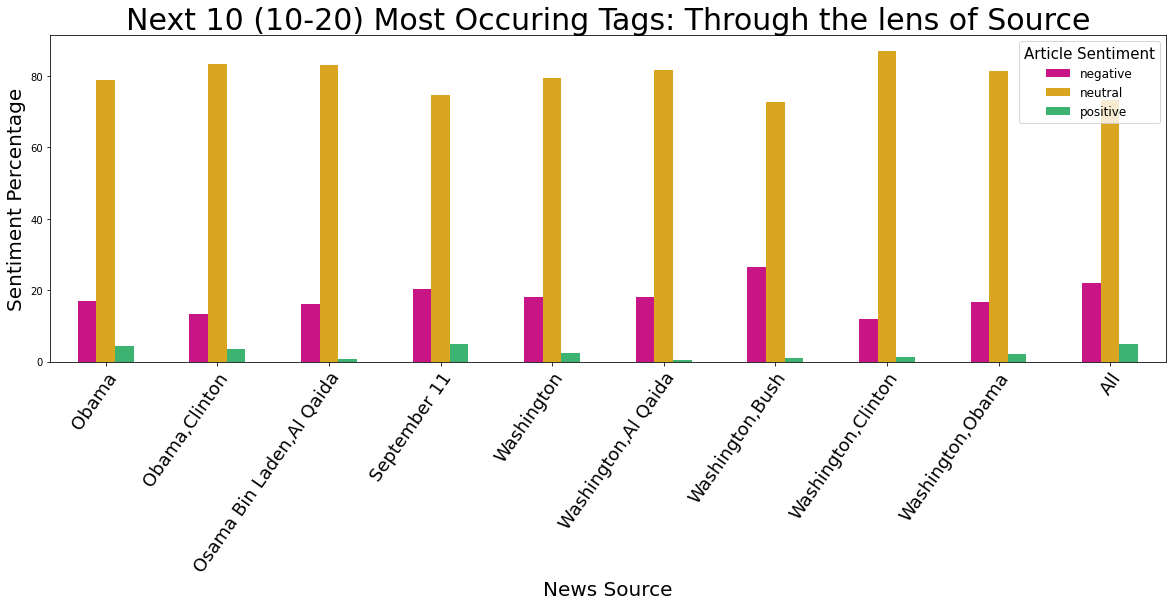

In [8]:
topics = {'America' : 'أمريكا',
            'American' : 'أمريكيّ',
            'American (f)' : 'أمريكيّة',
            'American (pl)' : 'أمريكيّين',
            'The United States' : 'الولايات المتحدة',
            'The United States' : 'دول موحّدة',
            'Washington' : 'واشنطن',
            'Bush' : 'بوش',
            'Obama' : 'أوباما',
            'Cheney' : 'تشيني',
            'Clinton' : 'كلينتون',
            'Osama Bin Laden' : 'أسامة بن لادن',
            'Al Gore' : 'آل غور',
            'World Trade Center' : 'مركز التجارة العالمي',
            '9/11' : '9/11',
            'September 11' : '11 سبتمبر',
            'Gulf War' : 'حرب الخليج',
            'Google' : 'غوغل',
            'Facebook' : 'فيسبوك',
            'Al Qaida' : 'القاعدة'}

def flip_key_value_pairs(dicts):
    
    res = dict((v,k) for k,v in dicts.items())    
    return res


def make_eng_tags(df_tags):
    eng_tags =[]
    
    rev_topics = flip_key_value_pairs(topics)
    for key, value in rev_topics.items():
        if key in df_tags:
            eng_tags.append(value)
            
    return eng_tags

df['english_tags'] = df.tags.apply(make_eng_tags)
#translates tags to english

tag_count = dict(df['tags'].value_counts())
df['tag_count'] = df['tags']
df['tag_count'] = df['tag_count'].map(tag_count)

top_20 = df[df.tag_count > 1300]
#only the top 20 tags

top_20['en_tags'] = top_20['english_tags'].apply(lambda x: ','.join(map(str, x)))
df['en_tags'] = df['english_tags'].apply(lambda x: ','.join(map(str, x)))
#change format

top_perc = pd.crosstab(top_20.en_tags, top_20.text_label, margins=True)
top_perc = top_perc.apply(lambda x: x / x['All'] * 100, axis=1)
top_perc = top_perc.drop(columns=['All'])

plt.rcParams["figure.figsize"] = (20, 6)

ax1= top_perc.head(10).plot(kind='bar', color=['mediumvioletred', 'goldenrod', 'mediumseagreen', 'purple'])
ax2= top_perc.tail(10).plot(kind='bar', color=['mediumvioletred', 'goldenrod', 'mediumseagreen', 'purple'])

ax1.set_xlabel("News Source", fontsize=20)
ax2.set_xlabel("News Source", fontsize=20)

ax1.set_ylabel("Sentiment Percentage", fontsize=20)
ax2.set_ylabel("Sentiment Percentage", fontsize=20)

xlabels = ax1.get_xticklabels() 
ax1.set_xticklabels(labels=xlabels, rotation=55, fontsize=18, ha='right', rotation_mode='anchor' )
xlabels = ax2.get_xticklabels() 
ax2.set_xticklabels(labels=xlabels, rotation=55, fontsize=18, ha='right', rotation_mode='anchor' )

ax1.set_title('Top 10 Most Occuring Tags: Through the lens of Source', size=30)
ax1.legend(fontsize=12, title='Article Sentiment',title_fontsize=15)

ax2.set_title('Next 10 (10-20) Most Occuring Tags: Through the lens of Source', size=30)
ax2.legend(fontsize=12, title='Article Sentiment',title_fontsize=15)

plt.show()


### Ouestion 2 Statistical Tests:

- H0: The top 10 most frequently occuring tags and and text_label (sentiment) are independent of one another
- H1:  The top 10 most frequently occuring tags and and text_label (sentiment) are have a relationship

In [9]:
alpha =.05
#set alpha
observed = pd.crosstab(top_20.en_tags, top_20.text_label)

chi2, p, degf, expected = stats.chi2_contingency(observed)
if p < alpha:
    print('Reject the null hypothesis.')
else:
    print('Fail to reject the null hypothesis.')

Reject the null hypothesis.


### Question 2 Takeaways:
What is the relationship between most frequently occuring tags and sentiment(target)?

   -   Looking at the top 20 most frequently occuring tags, a few items stick out. The tags Al Queda, Washington, and America are the 3 highest occuring outside of president names. Interestingly, America has the highest negativity rate amongst these 3 tags. Washington and Al Queda overall sentiments are closely matched. The tag of America,Washington together has the highest negativity occurances out of the top 20 tags. The highest positive rate in the top 20 tags is seen in the tag 'Facebook'. These findings lead to further exploration in the next 2 questions.

## Ouestion 3: Are there any sources that have change in sentiment based on president tag?

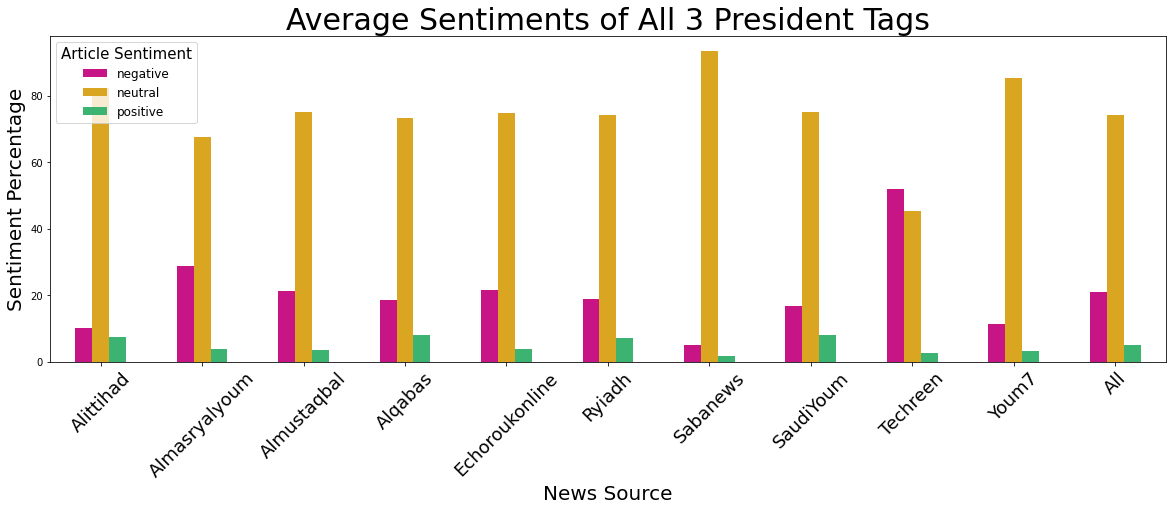

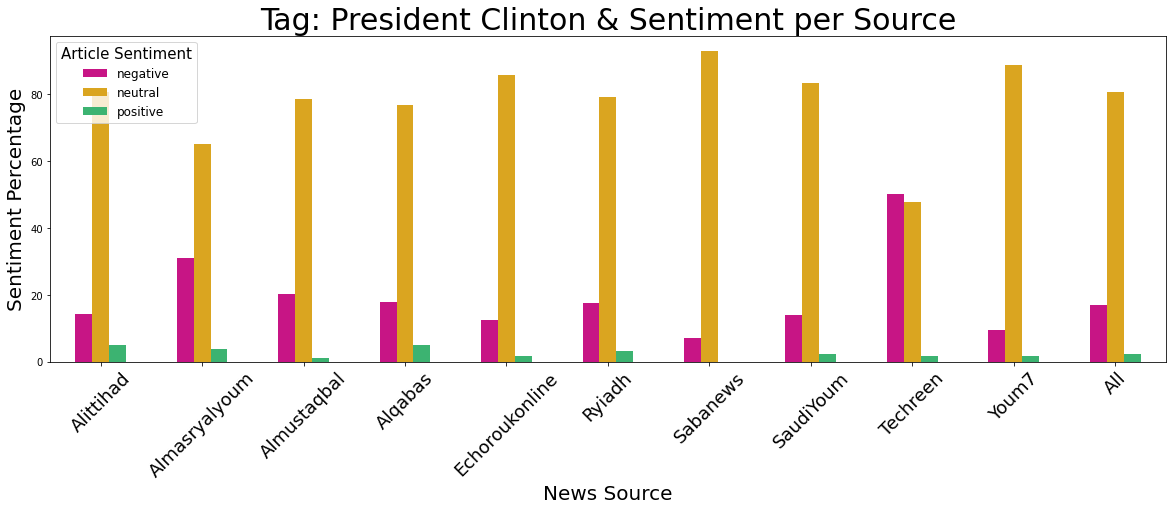

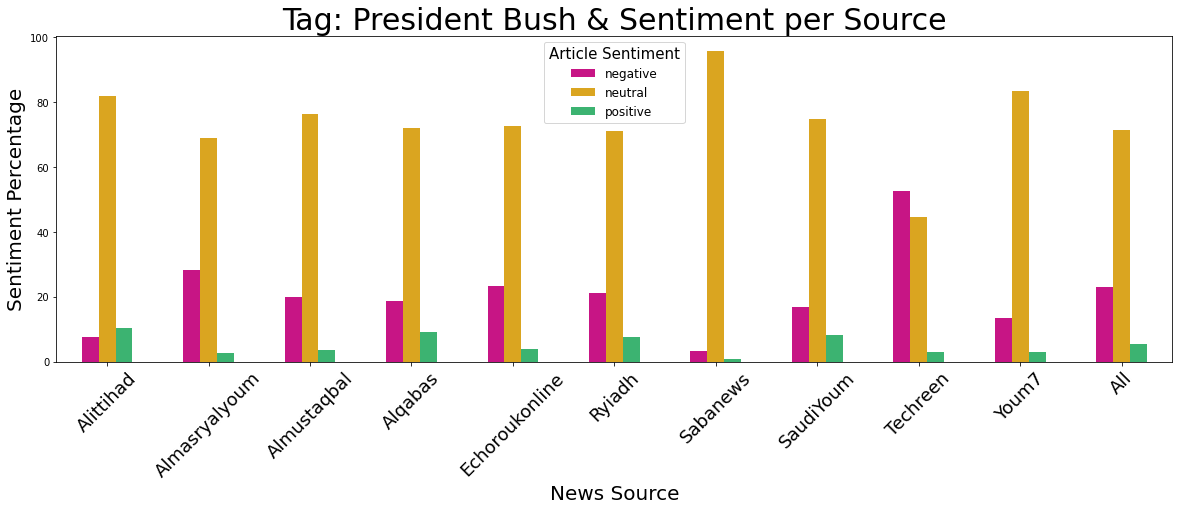

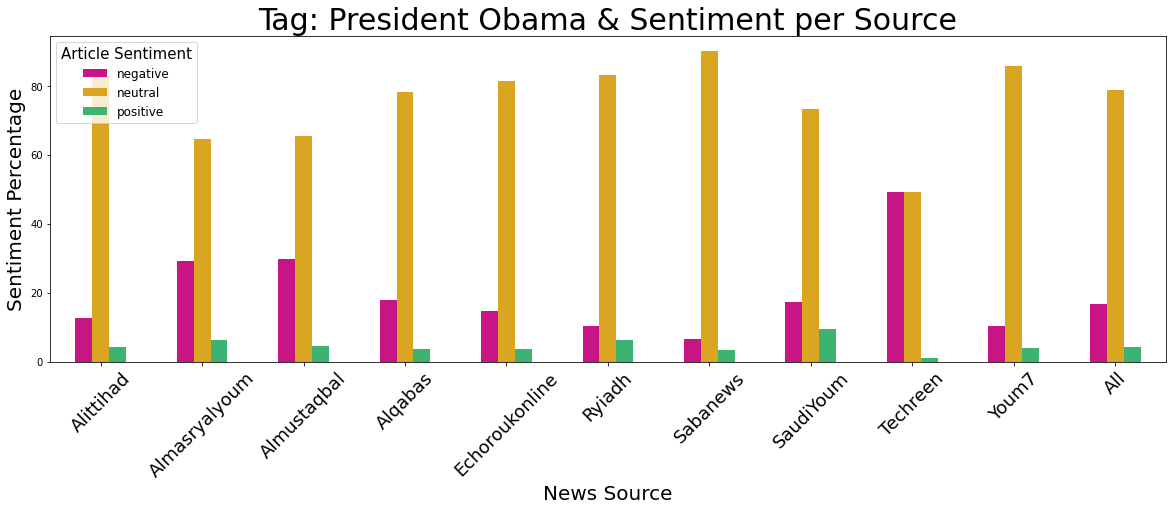

In [10]:
bush = df[(df['en_tags'] == 'Bush')]
obama = df[(df['en_tags'] == 'Obama')]
clinton = df[(df['en_tags'] == 'Clinton')]

presidents = pd.concat([bush, obama, clinton])
#dfs for presidents

pres_perc = pd.crosstab(presidents.source, presidents.text_label, margins=True)
pres_perc = pres_perc.apply(lambda x: x / x['All'] * 100, axis=1)
pres_perc = pres_perc.drop(columns=['All'])

clinton_perc = pd.crosstab(clinton.source, clinton.text_label, margins=True)
clinton_perc = clinton_perc.apply(lambda x: x / x['All'] * 100, axis=1)
clinton_perc = clinton_perc.drop(columns=['All'])

bush_perc = pd.crosstab(bush.source, bush.text_label, margins=True)
bush_perc = bush_perc.apply(lambda x: x / x['All'] * 100, axis=1)
bush_perc = bush_perc.drop(columns=['All'])

obama_perc = pd.crosstab(obama.source, obama.text_label, margins=True)
obama_perc = obama_perc.apply(lambda x: x / x['All'] * 100, axis=1)
obama_perc = obama_perc.drop(columns=['All'])

plt.rcParams["figure.figsize"] = (20, 6)

ax1= pres_perc.plot(kind='bar', color=['mediumvioletred', 'goldenrod', 'mediumseagreen', 'purple'])
ax2= clinton_perc.plot(kind='bar', color=['mediumvioletred', 'goldenrod', 'mediumseagreen', 'purple'])
ax3= bush_perc.plot(kind='bar', color=['mediumvioletred', 'goldenrod', 'mediumseagreen', 'purple'])
ax4= obama_perc.plot(kind='bar', color=['mediumvioletred', 'goldenrod', 'mediumseagreen', 'purple'])

ax1.set_xlabel("News Source", fontsize=20)
ax2.set_xlabel("News Source", fontsize=20)
ax3.set_xlabel("News Source", fontsize=20)
ax4.set_xlabel("News Source", fontsize=20)

ax1.set_ylabel("Sentiment Percentage", fontsize=20)
ax2.set_ylabel("Sentiment Percentage", fontsize=20)
ax3.set_ylabel("Sentiment Percentage", fontsize=20)
ax4.set_ylabel("Sentiment Percentage", fontsize=20)


xlabels = ax1.get_xticklabels() 
ax1.set_xticklabels(labels=xlabels, rotation=45, fontsize=18)
xlabels = ax2.get_xticklabels() 
ax2.set_xticklabels(labels=xlabels, rotation=45, fontsize=18)
xlabels = ax3.get_xticklabels() 
ax3.set_xticklabels(labels=xlabels, rotation=45, fontsize=18)
xlabels = ax4.get_xticklabels() 
ax4.set_xticklabels(labels=xlabels, rotation=45, fontsize=18)


ax1.set_title('Average Sentiments of All 3 President Tags', size=30)
ax1.legend(fontsize=12, title='Article Sentiment',title_fontsize=15)

ax2.set_title('Tag: President Clinton & Sentiment per Source', size=30)
ax2.legend(fontsize=12, title='Article Sentiment',title_fontsize=15)

ax3.set_title('Tag: President Bush & Sentiment per Source', size=30)
ax3.legend(fontsize=12, title='Article Sentiment',title_fontsize=15)

ax4.set_title('Tag: President Obama & Sentiment per Source', size=30)
ax4.legend(fontsize=12, title='Article Sentiment',title_fontsize=15)


plt.show()


### Question 3 Statistical Tests

- H0: The US president tags and and text_label (sentiment) are independent of one another
- H1:  The US president tags and text_label (sentiment) are have a relationship

In [11]:
alpha =.05

observed = pd.crosstab(presidents.en_tags, presidents.text_label)

chi2, p, degf, expected = stats.chi2_contingency(observed)
if p < alpha:
    print('Reject the null hypothesis.')
else:
    print('Fail to reject the null hypothesis.')

Reject the null hypothesis.


### Question 3  Takeaways:
Are there any sources that have change in sentiment based on president tag?

- Teshreen is more negative towards Bush than the other 2 presidents
- All sources averages are slightly more negative towards Buth
- Almustuqbal is noteably more negative towards Obama
- Most sources seem pretty consistent in sentiment towards presidents

## Ouestion 4: What is the relationship of the top 3 occuring tags (excluding president names) and article sentiment by individual news sources?

In [12]:
washington = df[(df['en_tags'] == 'Washington')]
al_q = df[(df['en_tags'] == 'Al Qaida')]
america = df[(df['en_tags'] == 'America')]

america_perc = pd.crosstab(america.source, america.text_label, margins=True)
america_perc = america_perc.apply(lambda x: x / x['All'] * 100, axis=1)
america_perc = america_perc .drop(columns=['All'])
america_perc
#shows 

text_label,negative,neutral,positive
source,,,
Alittihad,9.749304,74.651811,15.598886
Almasryalyoum,43.293348,52.422496,4.284156
Almustaqbal,29.203540,58.407080,12.389381
Alqabas,5.357143,81.785714,12.857143
Echoroukonline,29.398324,65.270373,5.331302
Ryiadh,45.330296,44.315593,10.354111
Sabanews,2.905569,95.883777,1.210654
SaudiYoum,23.194626,63.183430,13.621944
Techreen,46.012622,44.750430,9.236948


In [13]:
alq_perc = pd.crosstab(al_q.source, al_q.text_label, margins=True)
alq_perc = alq_perc.apply(lambda x: x / x['All'] * 100, axis=1)
alq_perc = alq_perc.drop(columns=['All'])
alq_perc

#look at this in percentages

text_label,negative,neutral,positive
source,,,
Alittihad,10.545024,79.591232,9.863744
Almasryalyoum,40.692641,57.479557,1.827802
Almustaqbal,18.857974,78.414257,2.727769
Alqabas,20.735334,74.506623,4.758043
Echoroukonline,15.484124,83.457468,1.058408
Ryiadh,17.500715,73.548756,8.950529
Sabanews,3.745928,88.029316,8.224756
SaudiYoum,19.285602,67.852107,12.862290
Techreen,36.688617,55.471935,7.839448


In [14]:
wash_perc = pd.crosstab(washington.source, washington.text_label, margins=True)
wash_perc = wash_perc.apply(lambda x: x / x['All'] * 100, axis=1)
wash_perc = wash_perc.drop(columns=['All'])
wash_perc

#look at this in percentages

text_label,negative,neutral,positive
source,,,
Alittihad,11.521308,83.919722,4.558969
Almasryalyoum,28.405172,70.129310,1.465517
Almustaqbal,15.405560,83.018057,1.576383
Alqabas,17.654702,79.486763,2.858535
Echoroukonline,16.086435,82.593037,1.320528
Ryiadh,8.094474,88.488879,3.416648
Sabanews,7.488767,91.962057,0.549176
SaudiYoum,17.482765,79.388368,3.128867
Techreen,47.236404,51.387347,1.376249


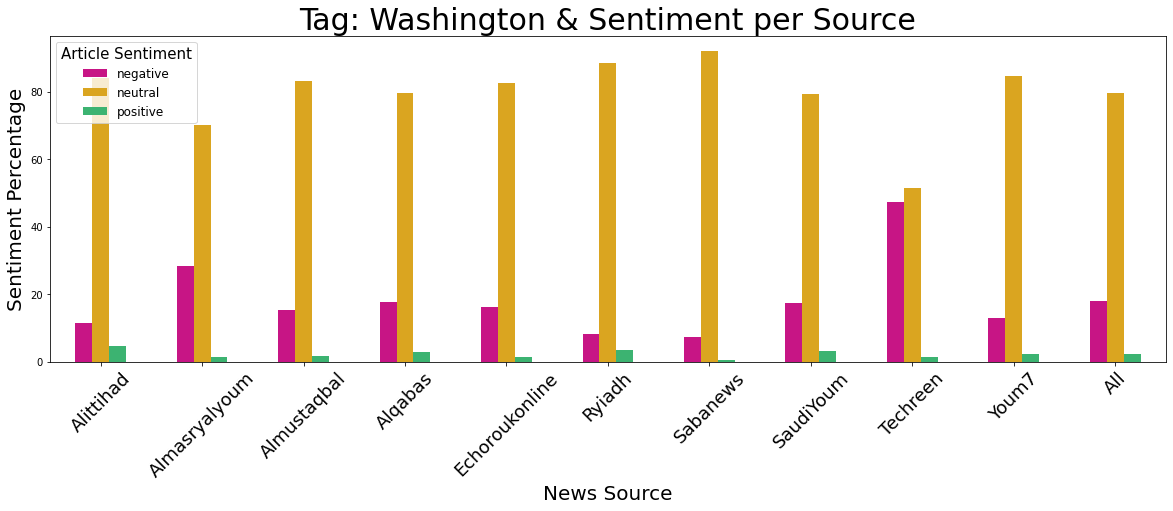

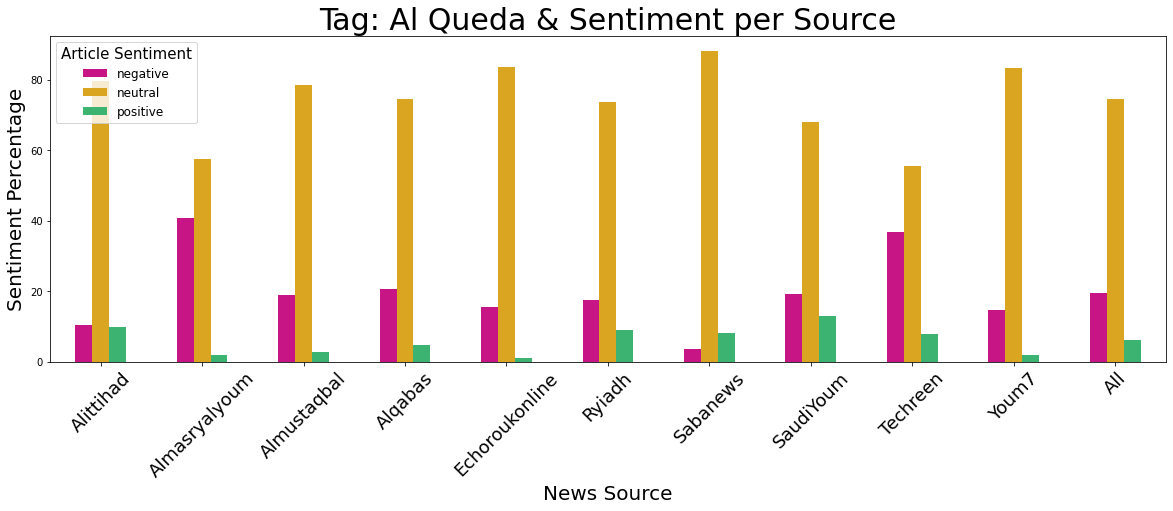

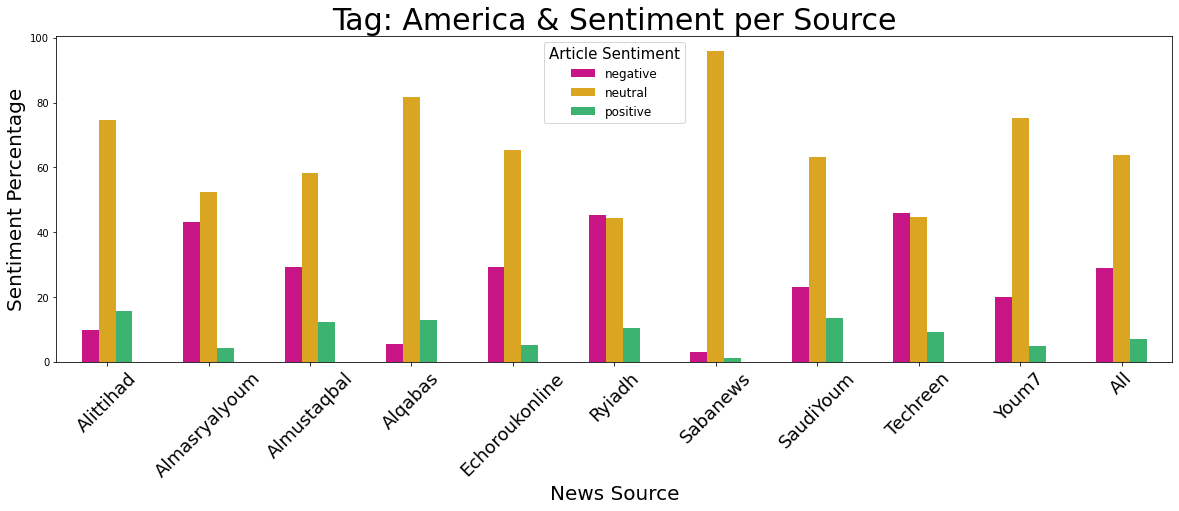

In [15]:
plt.rcParams["figure.figsize"] = (20, 6)

ax1 = wash_perc.plot(kind='bar', color=['mediumvioletred', 'goldenrod', 'mediumseagreen'])
ax2 = alq_perc.plot(kind='bar', color=['mediumvioletred', 'goldenrod', 'mediumseagreen'])
ax3 = america_perc.plot(kind='bar', color=['mediumvioletred', 'goldenrod', 'mediumseagreen'])

ax1.set_xlabel("News Source", fontsize=20)
ax2.set_xlabel("News Source", fontsize=20)
ax3.set_xlabel("News Source", fontsize=20)

ax1.set_ylabel("Sentiment Percentage", fontsize=20)
ax2.set_ylabel("Sentiment Percentage", fontsize=20)
ax3.set_ylabel("Sentiment Percentage", fontsize=20)

xlabels = ax1.get_xticklabels() 
ax1.set_xticklabels(labels=xlabels, rotation=45, fontsize=18)
xlabels = ax2.get_xticklabels() 
ax2.set_xticklabels(labels=xlabels, rotation=45, fontsize=18)
xlabels = ax3.get_xticklabels() 
ax3.set_xticklabels(labels=xlabels, rotation=45, fontsize=18)

ax1.set_title('Tag: Washington & Sentiment per Source', size=30)
ax1.legend(fontsize=12, title='Article Sentiment',title_fontsize=15)

ax2.set_title('Tag: Al Queda & Sentiment per Source', size=30)
ax2.legend(fontsize=12, title='Article Sentiment',title_fontsize=15)

ax3.set_title('Tag: America & Sentiment per Source', size=30)
ax3.legend(fontsize=12, title='Article Sentiment',title_fontsize=15)

plt.show()

### Ouestion 4: Takeaways

What is the relationship of the top 3 occuring tags (excluding president names) and article sentiment by individual news sources?

- Interestingly, most sources have slightly more negative America articles than Al Queda (over all 10% more negative for America)
- A large margin favoring Al Queda is seen with Ryiadh and Techreen
- Techreen also has a standout high negative rate for washington
- washington compared with al queda total sentiment is very close. Other than Techreen, there isn't another source that has noteable increased negativity compared to Al Queda here. Ryiadh actually has a noteable increase in neutrals in this subset

#### Exploration Summary: Summarizes all takeways from visuals, stat tests and questions. 

### Model

Depending on our steps here, we can show prep such as splitting, explanations for specific features we want to use and why, etc.


What are we focusing on? What is our baseline? Why is that our baseline?


If we will be testing on different models, show results - train then takeways

Validate - validate checks for overfitting if needed and helps us decide which model to take into test if the results are very close during train. If we need to show validate, its best to explain what we're looking for and what our final decision is 

Test - one final model and results of model.

### In conclusion (or better way of saying that)

Where we talk about our results compared to baseline, did we beat it, what kind of model, etc.

#### With more time:
   - Next steps we may expand on next week, things we want to look further into
   
#### Recommendations:
    - Can kind of depend what to put here.